### Written Homework 4: Question 25

In [28]:
#import statements:

from typing import Optional, List, Tuple
import numpy as np
import matplotlib.pyplot as plt

purples = ["#0a0612", "#392249", "#482980", "#673ab7",
           "#7a52aa", "#9779bd", "#b59fd0", "#d3c5e3"]

In [29]:
# making a random FC ANN class:

class classifier():
    def __init__(self, weight_range: Tuple[int, int] = (-10,10)):
        self.weight_range = weight_range
        self.w = np.random.uniform(weight_range[0], weight_range[1], size=(6,))

    def do_predict(self, input: np.ndarray):
        hidden_one = 1/(1+np.exp(self.w[0]*input[0] + self.w[2]*input[1]))
        hidden_two = 1/(1+np.exp(self.w[0]*input[1] + self.w[3]*input[1]))
        output = 1/(1+np.exp(self.w[4]*hidden_one + self.w[5]*hidden_two))
        return int(round(output))

    def get_range(self):
         return self.weight_range

In [30]:
def draw_decision_boundaries(classifier: classifier, n:int=100, sample_range: Tuple[int, int] = (-5,5)):
    # sample random examples:
    X = np.random.uniform(sample_range[0], sample_range[1], size=(n,2))
    y_hat = np.zeros(n)
    for i in range(n):
        y_hat[i] = classifier.do_predict(X[i])
    X_zero = X[y_hat==0]
    print('How many classified as zero: ' + str(len(X_zero[:,0])))
    X_one = X[y_hat==1]
    print('How many classified as one: ' + str(len(X_one[:,0])))
    plt.scatter(X_zero[:,0],X_zero[:,1], color = purples[2], label = 'y=zero')
    plt.scatter(X_one[:,0],X_one[:,1], color = purples[6], label = 'y=one')
    plt.xlim((-5,5))
    plt.ylim((-5,5))
    plt.legend()
    plt.title(str(classifier.get_range()) + ' classifier')
    plt.xlabel('x1 (input)')
    plt.ylabel('x2 (input)')
    plt.show()
    


##### (i) (-10,10) weight range

How many classified as zero: 432
How many classified as one: 568


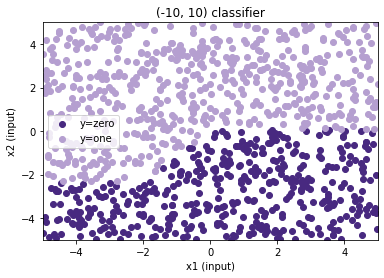

In [31]:
classifier_10_10 = classifier((-10,10))
draw_decision_boundaries(classifier_10_10, n=1000)

How many classified as zero: 295
How many classified as one: 705


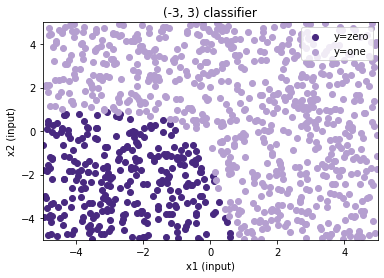

In [32]:
classifier_3_3 = classifier((-3,3))
draw_decision_boundaries(classifier_3_3, n=1000)

How many classified as zero: 391
How many classified as one: 609


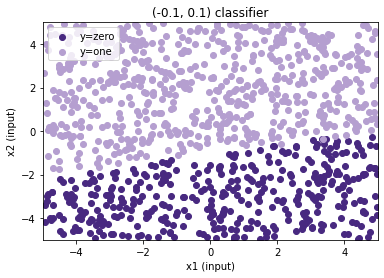

In [33]:
classifier_01_01 = classifier((-0.1,0.1))
draw_decision_boundaries(classifier_01_01, n=1000)